# Problem Statement 
Problem Statement
In the highly competitive and rapidly evolving ride-sharing industry, dynamic pricing models play a pivotal role in determining the cost of rides.
A ride-sharing company might calculate the cost of a ride using a formula that considers the base fare, distance, time, and dynamic pricing factors such as demand and supply.
Accurate pricing not only ensures optimal revenue generation for the service provider but also maintains customer satisfaction and loyalty. To enhance the precision of these pricing models, it is essential to identify and select the most influential factors that contribute to the historical cost of rides. 

We are tasked with conducting an Exploratory Data Analysis (EDA) and predicting the variable 'Historical_Cost_of_Ride' on a dataset comprising 1,000 records related to ride-sharing service costs. The dataset includes several key attributes that could potentially influence the pricing model:

Number_of_Riders: The number of riders participating in the ride.

Number_of_Drivers: The number of drivers available at the time of booking.

Location_Category: The category of the location (Urban, Suburban, Rural).

Customer_Loyalty_Status: The loyalty status of the customer (e.g., Silver, Regular).

Number_of_Past_Rides: The number of past rides the customer has taken.

Average_Ratings: The average ratings given to the drivers by the customer.

Time_of_Booking: The time of the day when the booking was made.

Vehicle_Type: The type of vehicle booked for the ride.

Expected_Ride_Duration: The expected duration of the ride in minutes.

Historical_Cost_of_Ride: The cost of the ride, which serves as the target variable for predictive modeling.

Our objective is to perform a thorough EDA to uncover patterns, correlations, and insights within the dataset. By analyzing these attributes, we aim to identify the most significant features that influence the historical cost of a ride. This process will involve statistical analysis, data visualization, and feature selection techniques to ensure that the most relevant variables are used in constructing an effective predictive pricing model.

Ultimately, the findings from this EDA will provide a robust foundation for developing a dynamic pricing model that can accurately predict ride costs, thereby enhancing the efficiency and competitiveness of the ride-sharing service.

# Hypothesis 
1. More number of riders / high demand - There will be high amount of variability in cost and pricing as demand plays a crucial role
2. Location: In Urban areas , historical cost of ride will be higher as compared to suburban and rural. 
3. Number of drivers : Driver availability can influence dynamic pricing models.
4. Customer loyalty status and no. of past riders would not affect the cost of ride direclty but Loyal customers might receive discounts or have access to special pricing.
5. The average ratings given to the drivers by the customer will not affect the cost of ride directly 
6. Time_of_Booking: Time of day can affect demand and pricing (e.g., rush hours - high cost vs. off-peak hours- low cost).
7. Vehicle_Type: Different vehicle types (e.g., Sedan, SUV, Hatchback) have different pricing structures.eg premiun car will be costlier than regular ones. 
8. Expected_Ride_Duration: Longer rides typically cost more due to increased distance and time

In [1]:
#Importing packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\sharm\Downloads\dynamic_pricing.csv")
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [3]:
#to check Dtype and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


# EDA and Feature Selection 

#UNIVARIATE ANALYSIS 

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

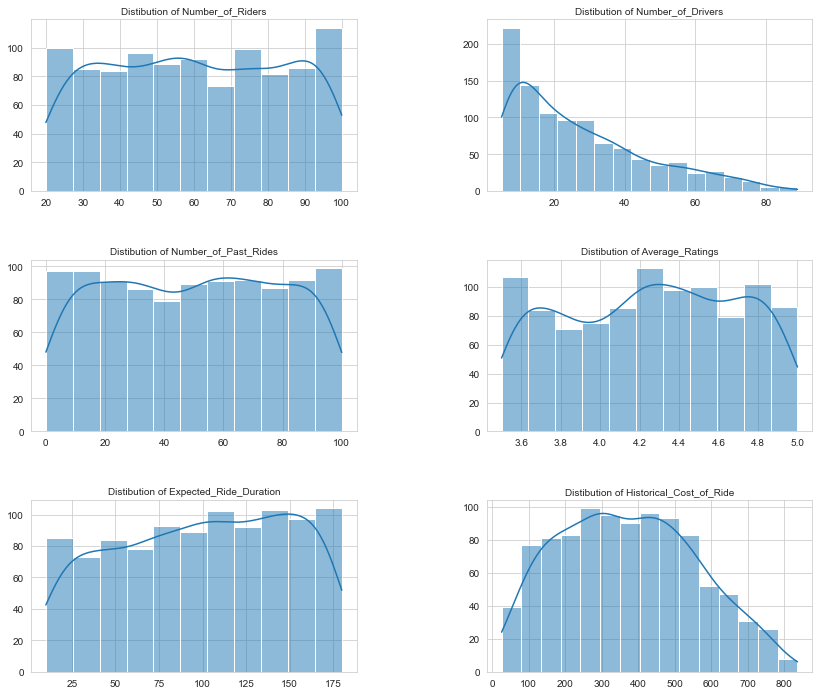

In [4]:
#defining categorical variable and numeric variable 
numerical_var = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides','Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_var = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type'] 

# set the aesthetics for the plots
sns.set_style("whitegrid")

#descriptive statistics 
descriptive_stats = df[numerical_var].describe()
print(descriptive_stats)

#dealing with categorical variables (countplot)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#dealing with NUMERICAL VAR  histogram (histplot)

for i, col in enumerate(numerical_var):
    sns.histplot(df[col], kde=True , ax= axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distibution of {col}', fontsize=10)
    axes[i//2,i%2].set_xlabel('')
    axes[i//2,i%2].set_ylabel('')
    

    

Observations and insights from numerical variables 

1. Number of riders: Seems to have high Variability. The no. of rider could vary from 20 to 100 with a mean of 60 with a high s.d of 23. The distribution seems uniform throughout. 
2. Number of drivers: This has a right skewed distribution with a median of 22 which shows that at higher no of riders there is lower no. of drivers available. Ranges from 5 to 85.  
3. No. of past drivers: Graph has uniform distribution with a mean of 50 and high s.d i.e 29, high variability could be because of variation in customer experience. 
4. Average Ratings: Having mean as 4.25 indicates a positive customer experience, peaks at 4.3. Ranges from 3.5 to 5. 
5. Expected_Ride_Duration: The expected ride duration varies significantly, with a mean of approximately 99.59 minutes. The distribution is fairly uniform. Ranges from 10 to 180 mins. 
6. Historical_Cost_of_Ride: The cost of ride distribution seems rightly skewed which shows that most of the rides cost lower than the mean but some of the rides are highly expensive. The cost varies from 26 to 836 units with a mean of 372 unit and median 362.


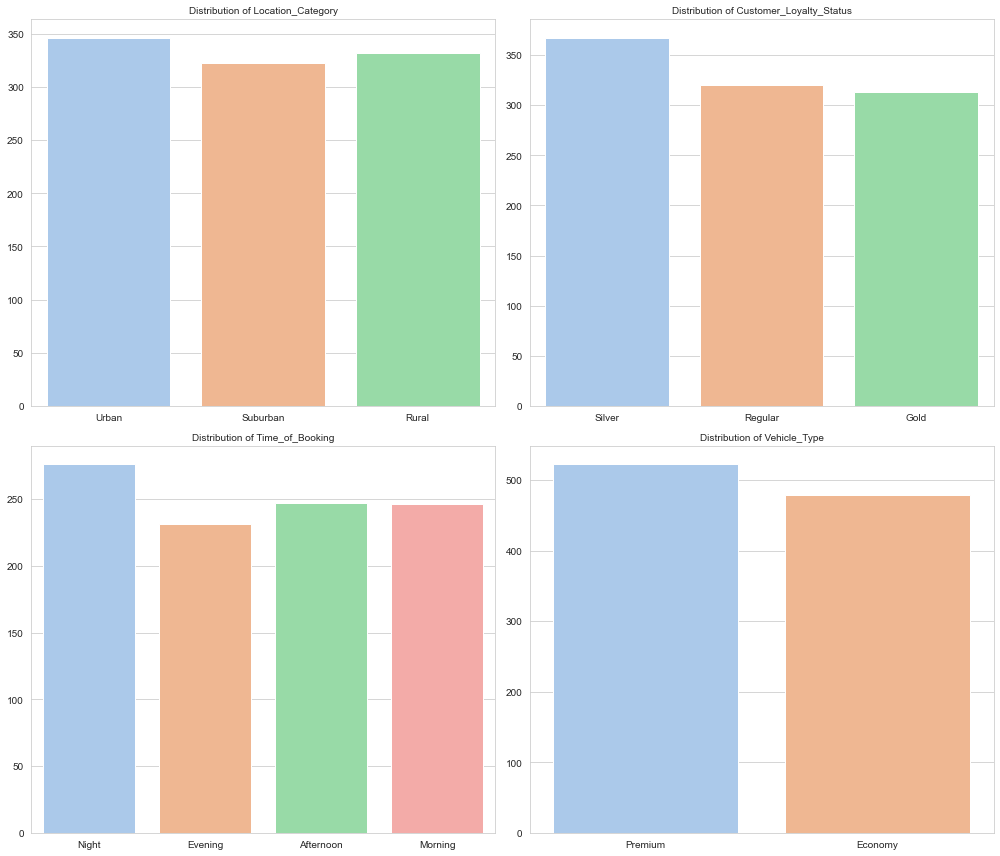

In [5]:
# set the aesthetics for the plots
sns.set_style("whitegrid")

#dealing with categorical variables (countplot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Define a light color palette
custom_palette = sns.color_palette("pastel")


for i, col in enumerate(categorical_var):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2], palette =custom_palette)
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=360)

plt.tight_layout()


Observations and insights
1. Location_Category: The distribution across different location categories shows a variation, with “Urban” likely being the most common, followed by “Suburban” and “Rural” categories.This shows the availibility of 'urban' rides are likely to be more  than the 'Suburban' and 'Rural', potentially due to demand and availbility. 

2. Time_of_Booking: Again the cost will depend on the demand and availability during a particular time period. This data shows that the booking is high at night time.  

3. Vehicle_Type: Clearly shows the count of premium is higher than the economy. This again will depend upon the different locations (urban.rural,suburban) and the demand. And the type of vehicle is likely to affect the cost directly. 



BIVARIATE ANALYSIS

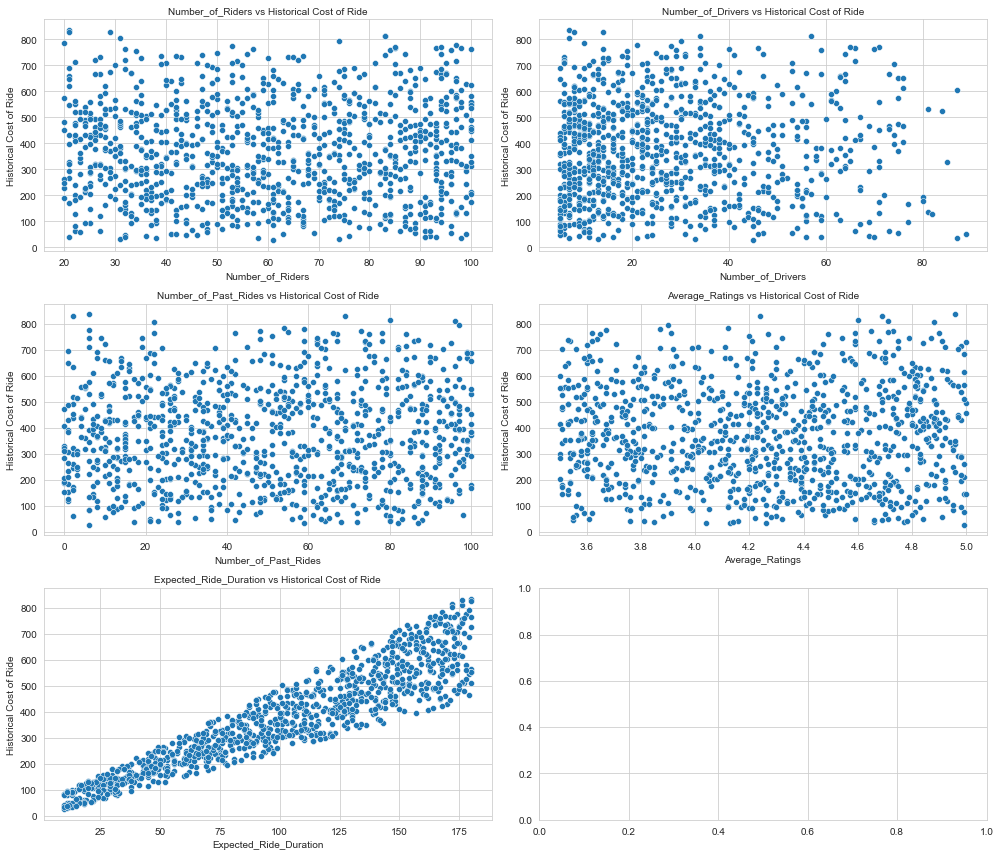

In [6]:
#NUMERICAL VARIABLES
#Scatter Plot for numerical variable against the target variable 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot box plots for each numerical variable against the target variable
for i, col in enumerate(numerical_var):
    if col != 'Historical_Cost_of_Ride':  # Skip the plot for Historical_Cost_of_Ride vs Historical_Cost_of_Ride
        sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'{col} vs Historical Cost of Ride', fontsize=10)
        axes[i//2, i%2].set_xlabel(col)
        axes[i//2, i%2].set_ylabel('Historical Cost of Ride')
    

plt.tight_layout()
plt.show()

 observation 
 1. no direct linear relation between the number of riders and the cost of the ride. This fails to prove our hypothesis. 
 2. no linear or direct relation between the number of drivers available and ride cost. It indicates that while driver availability might affect pricing dynamics, it does not do so in a simple, direct manner.
 3. Again no evident linear raltionship between the number of past rides a customer has had and the cost of their rides.
 4. No evident relation between the avg. ratings and cost of their ride, so fails to prove hypothesis 
 5. Duration : Last scatter shows a clear upward sloping linear relationship between the expected ride duration and cost. Higher the duration of the ride, higher will be the cost of the ride. It is intuitive, as longer rides would naturally cost more. So duration contributes highly in determinig the cost. 
 

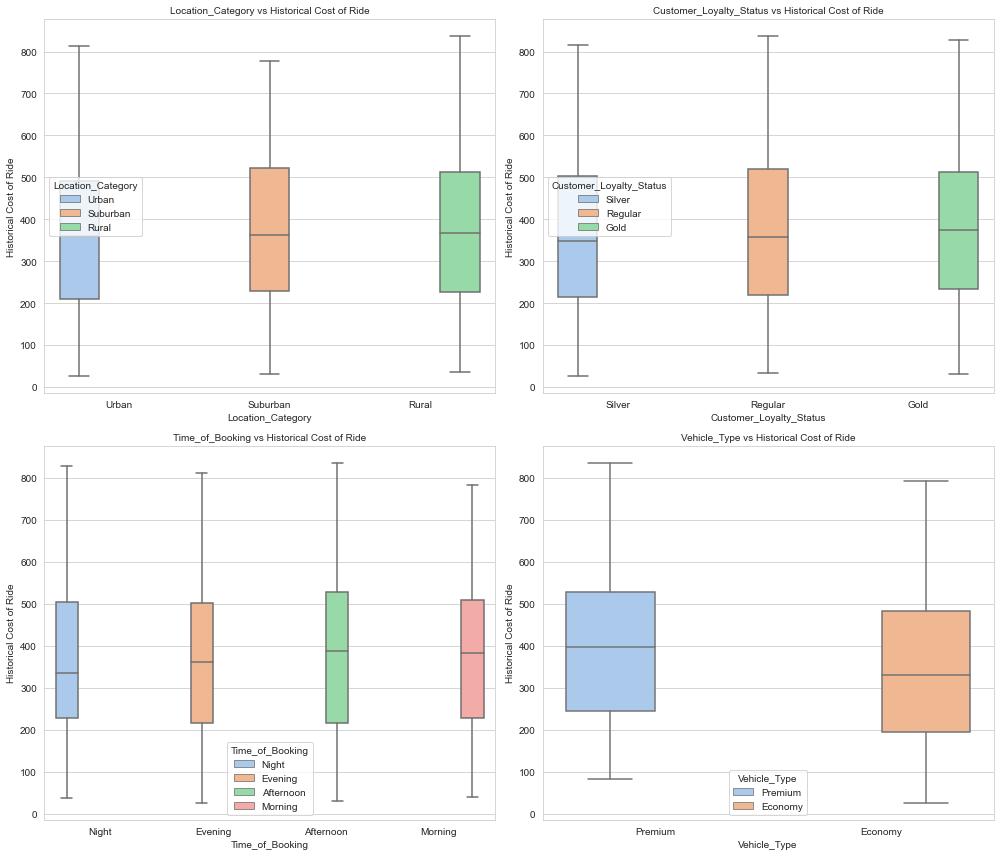

In [7]:
#dealing with CATEGORICAL VARIABLE using Boxplots


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

palette = sns.color_palette('pastel')
# Plot box plots for each categorical variable against the target variable
for i, col in enumerate(categorical_var):
        sns.boxplot(data=df, x=col, y='Historical_Cost_of_Ride',hue = col, ax=axes[i//2, i%2],palette = palette)
        axes[i//2, i%2].set_title(f'{col} vs Historical Cost of Ride', fontsize=10)
        axes[i//2, i%2].set_xlabel(col)
        axes[i//2, i%2].set_ylabel('Historical Cost of Ride')
        axes[i//2, i%2].tick_params(axis='x',rotation=360)
    

plt.tight_layout()
plt.show()



Observations
1. Location as against cost shows high variability, It suggests that location plays a crucial role in determining ride costs, likely due to differences in demand, availability, and operational costs. This doesnt prove the hypothesis of ride being costlier in urban areas .
2. Customer loyalty status: The range of cost and customer status is lower for silver and gold and a little bit higher for regular which shows there might be some perks and discounts for higher status customers. 
3.  Time of booking : with certain times of day showing different cost distributions. It could reflect demand variations throughout the day, with peak times potentially commanding higher prices.
4. Vehicle type- This goes with the hypothesis, premium vehicles are clearly costlier than regular, indicating that vehicle type is a critical factor in pricing.

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


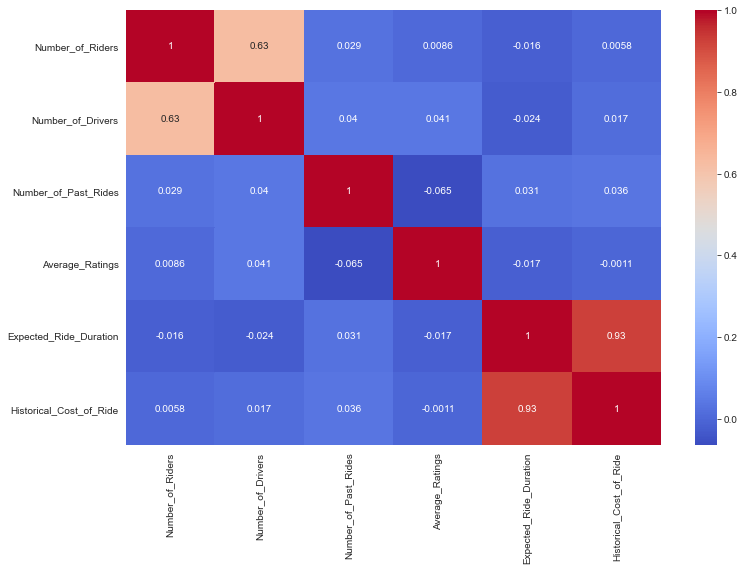

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Features that affects the cost are - no. of riders, no. of drivers, expected_ride_duration 